# Individual Assignment 2

##### Prepared by Long He & Ruijiu Mao

#### (Due on Sep 26, 23:59.) 

##### You can work on this file directly and fill in your answers/code below. Please submit the output in HTML file (name your file like A0123456X.html if your student number is A0123456X) onto LumiNUS/Files/Student Submission/Assignment1 folder. 


#### Student Name: ENTER YOUR NAME HERE





## A preliminary example: SVM on Iris Data

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


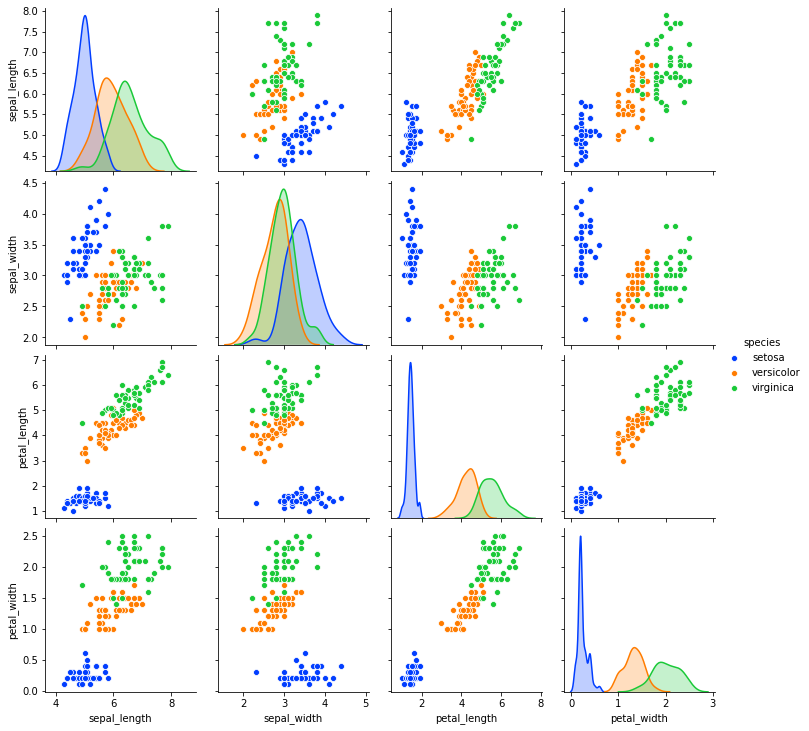

In [1]:
# visualize Iris data
import seaborn as sns
iris = sns.load_dataset("iris")
print(iris.head())
y = iris.species
X = iris.drop('species',axis=1)
sns.pairplot(iris, hue="species",palette="bright")

In [2]:
# keep only 2 features and 2 classes for better visualization
df=iris[(iris['species']!='virginica')]
df=df.drop(['sepal_length','sepal_width'], axis=1)
df.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


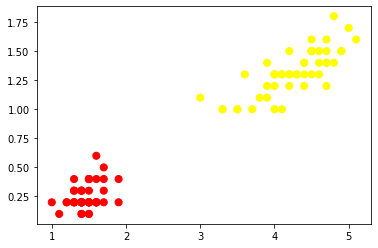

In [3]:
import matplotlib.pyplot as plt 

# convert categorical values to numerical target for plot
df=df.replace('setosa', 0)
df=df.replace('versicolor', 1)

X=df.iloc[:,0:2]
y=df['species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

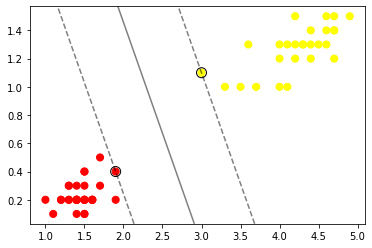

In [4]:
# randomly split into training and test
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

# fit SVM with linear kernel
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=100) # set a large C to get hard-margin svm!
model.fit(X_train, y_train)

# visualize support vectors and the boundaries
ax = plt.gca()
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [5]:
y_pred=model.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

1.0

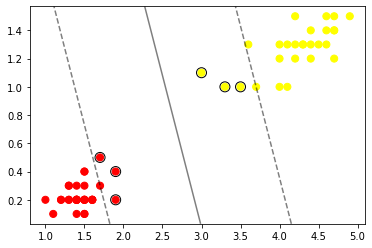

In [6]:
# refit SVM with a small C
model = SVC(kernel='linear', C=0.2)
model.fit(X_train, y_train)

ax = plt.gca()
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [7]:
y_pred=model.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

1.0

We see a wider margin with more misclassfied points. Note that, in soft margin, support vectors now includes data points on the margin boundary as well as those on the wrong side of the margin boundary.

In [8]:
# evaluate in the test data
y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # proportion of correctly classified

1.0

### Non-linear SVM

(-1.206616942914115, 1.2586098012476543)

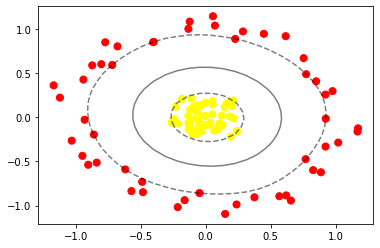

In [9]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
model = SVC(kernel='rbf', C=1E6)
model.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
P = model.decision_function(xy).reshape(X.shape)

# plot decision boundary and margins
ax.contour(X, Y, P, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(model.support_vectors_[:, 0],
           model.support_vectors_[:, 1],
           s=300, linewidth=1, facecolors='none');
ax.set_xlim(xlim)
ax.set_ylim(ylim)

## Assignment Problem: Identify high-demand regions for car2go

car2go used to be the largest car sharing company in the world with 2,500,000 registered members as of 2017. It operated in San Diego California using a pure electric vehicle (EV) fleet, between November 2011 and December 2016. Based on the car2go dataset collected, we simulate the travel demand in each of 50 zip codes in San Diego County. We identify high-demand regions by comparing the travel demand with a threshold, e.g., weekly demand>2,000. The high-demand indicator along with demographics of zip codes are summarized in dataset “car2go_50zip.csv”. The columns in the dataset are summarized as below.

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Explanation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>zip</td>
      <td>Trip origin zip code</td>
    </tr>
    <tr>
      <td>population</td>
      <td>Population in the zip code</td>
    </tr>
      <tr>
      <td>income</td>
      <td>Median income in the zip code</td>
    </tr>
      <tr>
      <td>business</td>
      <td># of business establishments in the zip code</td>
    </tr>
      <tr>
      <td>is.high</td>
      <td>Target variable. True if the demand is high; False otherwise.</td>
    </tr>
  </tbody>
</table>

In this assignment, we aim to develop classification models to predict high demand regions (named by zip codes), from the dataset of car2go in San Diego, California. Hopefully, the resulting classification models can help us design better car sharing systems in other cities or countries.

### Questions and Answers

#### (1)	Visualize the demand classes in population and income. Discuss your observation from the plot. [1 mark]

Answer: People with higher income tend to have higher demand level


#### (2)	Randomly split the entire data into training (e.g., 70%) and test (e.g., 30%) data. [1 mark]

Answer: 


In [1]:
# use train_test_split


#### (3)	Train a SVM classifer with C=0.5, report the decision boundary formula and the in-sample accuracy. [1 mark]
Answer:

Decision boundary: model.coef_[0] x population + model.coef_[1] x income + model.coef_[2] x business + model.intercept_
in-sample accuracy: accuracy_score(y_train, y_pred)

#### (4)	Train a SVM classifer with C=100, report the decision boundary formula and the in-sample accuracy. [1 mark]
Answer:

#### (5)	Cross validate the hyper-parameter C for SVM and report the out-of-sample performance of the final model. [2 marks]
Answer:

In [2]:
# cross validation using only training data; Examples: https://scikit-learn.org/stable/modules/cross_validation.html
# You may enumerate C values, e.g., C={0.5, 1, 10, 50, 100}.
# report accuray of final model using the test data


#### (6)	Train a logistic regression model and report its out-of-sample performance. [1 mark]
Answer:

In [3]:
from sklearn.linear_model import LogisticRegression


#### (7)	Write $f(x)$ formula for the logistic regression model and calculate the probability of high-demand for the 1st region in the test data using $f(x)$. [1 mark]
Answer:

#### (8)	Using Python function to calculate the probability of high-demand for the 1st region in the test data. [1 mark]
Answer:

#### (9)	Discuss which model you would like to deploy to forecast high demand regions in new cities. [1 mark]
Answer: